In [8]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
import spacy.cli
from langdetect import detect
import contractions
import unicodedata
import numpy as np
import pandas as pd
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
tweet=pd.read_csv(r"C:\Users\PC\Downloads\archive(4)\tweets.csv")
print(tweet)

          author                                            content country  \
0      katyperry  Is history repeating itself...?#DONTNORMALIZEH...     NaN   
1      katyperry  @barackobama Thank you for your incredible gra...     NaN   
2      katyperry                Life goals. https://t.co/XIn1qKMKQl     NaN   
3      katyperry            Me right now 🙏🏻 https://t.co/gW55C1wrwd     NaN   
4      katyperry  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...     NaN   
...          ...                                                ...     ...   
52537   ddlovato               Life couldn't be better right now. 😊     NaN   
52538   ddlovato  First Monday back in action. I'd say 21.6 mile...     NaN   
52539   ddlovato  Crime shows, buddy, snuggles = the perfect Sun...     NaN   
52540   ddlovato                          ❄️ http://t.co/sHCFdPpGPa     NaN   
52541   ddlovato                      ❤️❄️✈️ http://t.co/ixmB5lv17Z     NaN   

              date_time            id language  lat

In [10]:
tweet.shape

(52542, 10)

In [12]:
tweet.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        author  content  country  date_time     id  language  latitude  \
0       False    False     True      False  False     False      True   
1       False    False     True      False  False     False      True   
2       False    False     True      False  False     False      True   
3       False    False     True      False  False     False      True   
4       False    False     True      False  False     False      True   
...       ...      ...      ...        ...    ...       ...       ...   
52537   False    False     True      False  False     False      True   
52538   False    False     True      False  False     False      True   
52539   False    False     True      False  False     False      True   
52540   False    False     True      False  False     False      True   
52541   False    False     True      False  False     False      True   

       longitude  number_of_likes  number_of_shares  
0      

In [13]:
blanks = []  

for ms in tweet.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [14]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [17]:
#Checking for the number of unique Languages in the dataset
tweet['content'].nunique()

52425

In [107]:
num_rows = tweet.shape[0]
print(num_rows)

52542


In [18]:
#Checking for unique languages
tweet['content'].unique()

array(['Is history repeating itself...?#DONTNORMALIZEHATE https://t.co/ngG11quhmK',
       '@barackobama Thank you for your incredible grace in leadership and for being an exceptional… https://t.co/ZuQLZpt6df',
       'Life goals. https://t.co/XIn1qKMKQl', ...,
       'Crime shows, buddy, snuggles = the perfect Sunday night 🐶❤️😍',
       '❄️ http://t.co/sHCFdPpGPa', '❤️❄️✈️ http://t.co/ixmB5lv17Z'],
      dtype=object)

In [19]:
#Calculating the count for each response value
tweet['content'].value_counts()

love you                                                                                                                      11
love                                                                                                                           8
#PURPOSE https://t.co/ZWMJvhasht                                                                                               7
I love you                                                                                                                     6
♡                                                                                                                              6
                                                                                                                              ..
5 Reasons Why You Shouldn't Miss The Tony Gaga @PBS Special http://t.co/2gXDSNm4Ny                                             1
Thank you Alexis Mabille for the dress. A real lady loves her lace. http://t.co/lCMTSv4kxN       

In [23]:
# We will drop the tweetid column and remove the stopwords for this analysis
# The presence of stopwords will distort the data shown

def remove_stop_words(word):
    word_list = word.split(" ")
    stop_words = stopwords.words('english')
    clean = []
    return " ".join([word for word in word_list if word not in stop_words ])
    
tweet_df = tweet.drop(['content'], axis=1)
tweet_df["author"] = tweet_df["author"].apply(remove_stop_words)
tweet_df.head()

,author,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [28]:
tweet.author.unique()

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

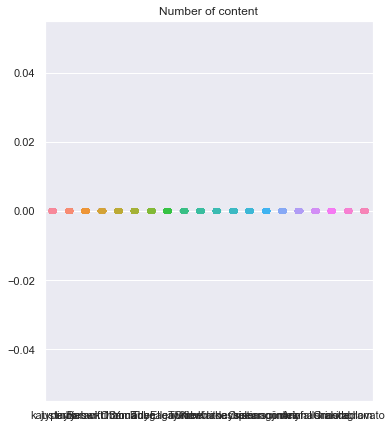

In [31]:
"""
We calculate the number of mentions we have for each sentiment in a tweet
"""

# mention count 
tweet['content'] = tweet['content'].apply(lambda x: len([i for i in str(x) if i == '@']))

#plot the number of mentions
plt.subplot(1,3,3)
sns.stripplot(y='content', x='author', data=tweet, jitter=True)
plt.title('Number of content')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 20, 7)

plt.show()

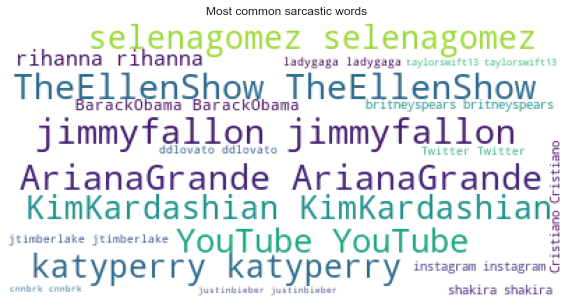

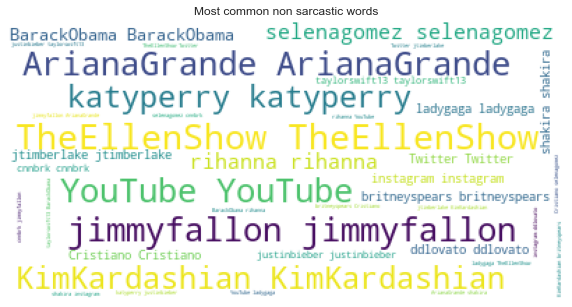

In [39]:
wc1 = WordCloud(
    background_color='white', 
    max_words=100)

wc1.generate(' '.join(text for text in tweet.loc[tweet['content'] == 0, 'author']))

wc = WordCloud(
    background_color='white', 
    max_words=100)

wc.generate(' '.join(text for text in tweet.loc[tweet['content'] == 0, 'author']))
plt.figure(figsize=(10,15))
plt.imshow(wc1)
plt.axis('off')
plt.title("Most common sarcastic words")
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.title("Most common non sarcastic words")
plt.show()

In [88]:
#identify the row we want 
tweet = tweet['content']

In [98]:
# creating a new DataFrame
tweet= pd.DataFrame(tweet)

# Add sentiment column to the tweets dataframe
tweet['content'] = tweet['content']

tweet.head()

,content
0,0
1,0
2,0
3,0
4,0


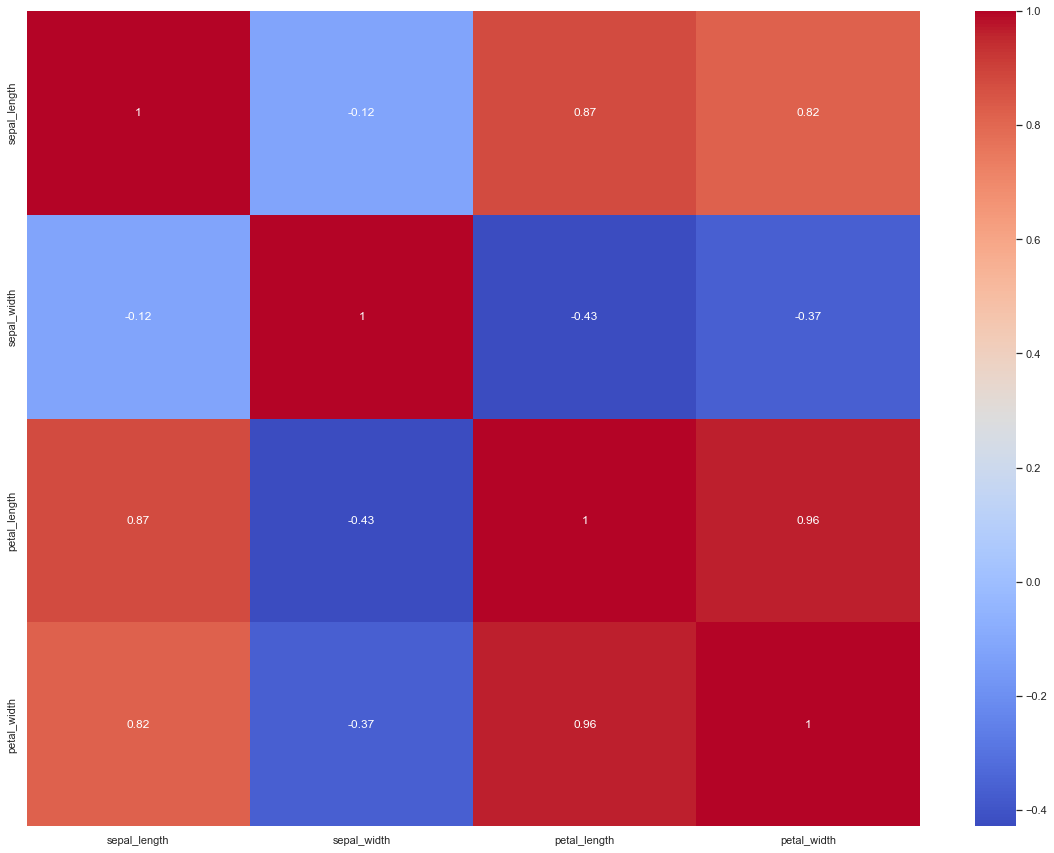

In [177]:
# Load a dataset as a Pandas DataFrame (example using iris dataset)
iris = sns.load_dataset('iris')

# Calculate the correlation matrix
corr = iris.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()


In [189]:
# Scatter and density plots
def plotScatterMatrix(tweet, plotSize, textSize):
    tweet= tweet.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    tweet = tweet.dropna('columnNames')
    tweet = tweet[[col for col in tweet if tweet[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(tweet)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    tweet = tweet[columnNames]
    ax = pd.plotting.scatter_matrix(tweet, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [170]:
tweet.dataframeName = 'tweets.csv'
nRow, nCol = tweet.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 52542 rows and 1 columns
